## Data exploration

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

Necessary imports:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from data_related.data import Data

Load the data.

In [3]:
data = Data()

Preparing data ...
... data is prepared.


Compute variance of ratings for each user.

In [4]:
user_vars = [np.var(list(data.get_user(user).values())) 
             for user in range(data.num_users)]

Plot variance of user ratings.

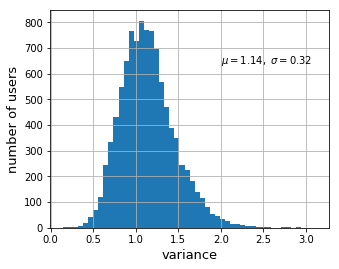

In [5]:
plt.figure(figsize=(5, 4))
plt.hist(user_vars, bins=50)
plt.xlabel('variance', fontsize=13)
plt.ylabel('number of users', fontsize=13)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
mu, sigma = np.mean(user_vars), np.std(user_vars)
plt.text(2, 640, r'$\mu = {:.2f},\ \sigma = {:.2f}$'.format(mu, sigma))
plt.show()

+ Before implementing our machine learning procedure, we analyzed our dataset in order to make
  sure that the ratings were obtained from legitimate users. In other words, we made sure that
  there are no bots, spammers, etc. that generated uniform ratings.
+ As it can be seen from the above plot, the variance of user ratings form a Gaussian distribution,
  which ensures that there are no significant bots or spammers that should be taken care of.

Compute rating deviations for users and items

In [6]:
user_means = [np.mean(list(data.get_user(user).values())) 
              for user in range(data.num_users)]
user_deviations = np.array(user_means) - data.global_mean

item_means = [np.mean(list(data.get_item(item).values())) 
              for item in range(data.num_items)]
item_deviations = np.array(item_means) - data.global_mean

Plot the deviations

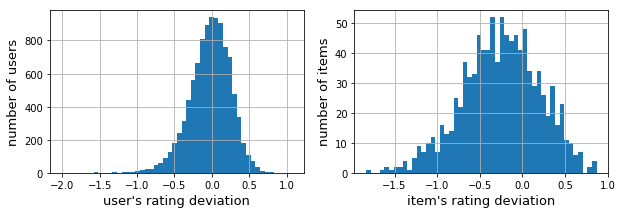

In [7]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.hist(user_deviations, bins=50)
plt.xlabel('user\'s rating deviation', fontsize=13)
plt.ylabel('number of users', fontsize=13)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(item_deviations, bins=50)
plt.xlabel('item\'s rating deviation', fontsize=13)
plt.ylabel('number of items', fontsize=13)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()

+ Another important thing that we have checked is the deviation of ratings for users and items.
+ We found out that some users tend to rate higher or lower, where similarly some movies tend to 
  be rated higher or lower. This is a useful aspect of the dataset that led us to the BSGD model,
  which is explained in detail in our report.